# statistical inference

In [1]:
# -*- coding: utf-8 -*-

"""

@ author: taehyeong93@korea.ac.kr

"""

import numpy as np
import scipy as sp
from scipy import stats

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc, rcParams

%matplotlib inline

# hangul font
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# minus font
rcParams['axes.unicode_minus'] = False

## 1. 추정 (estimation)

### 1-1. 점 추정, 구간 추정

In [2]:
height=np.array([163,161,168,161,157,162,153,159,164,170,
                 152,160,157,168,150,165,156,151,162,150,
                 156,152,161,165,168,167,165,168,159,156])

In [3]:
xbar_h=np.mean(height);print(xbar_h)
var_h=np.var(height,ddof=1);print(var_h)
sd_h=np.std(height,ddof=1);print(sd_h)

160.2
35.88965517241378
5.990797540596225


In [4]:
median_h=np.median(height);print(median_h)
min_h=np.min(height);print(min_h)
max_h=np.max(height);print(max_h)

161.0
150
170


In [5]:
sum_h=np.sum(height);print(sum_h)
n=height.size;print(n)

4806
30


In [6]:
se_h=stats.sem(height);print(se_h)

1.0937649834770078


In [7]:
z_alpha=stats.norm.ppf(1-0.05/2);print(z_alpha)
interval=z_alpha*se_h;print(interval)
CI=[xbar_h-interval,xbar_h+interval];print(CI)

1.959963984540054
2.1437399751659827
[158.05626002483402, 162.34373997516596]


### 1-2. 확률분포 추정

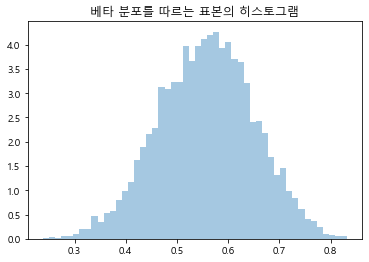

In [8]:
np.random.seed(0)
x = sp.stats.beta(15, 12).rvs(10000)

sns.distplot(x, kde=False, norm_hist=True)
plt.title("베타 분포를 따르는 표본의 히스토그램")
plt.show()

In [9]:
def estimate_beta(x):
    x_bar = x.mean()
    s2 = x.var()
    a = x_bar * (x_bar * (1 - x_bar) / s2 - 1)
    b = (1 - x_bar) * (x_bar * (1 - x_bar) / s2 - 1)
    return a, b


params = estimate_beta(x)
print(params)

(15.346682046700685, 12.2121537049535)


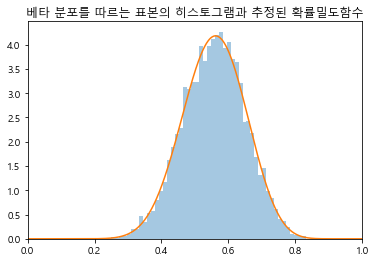

In [10]:
xx = np.linspace(0, 1, 1000)
sns.distplot(x, kde=False, norm_hist=True)
plt.plot(xx, sp.stats.beta(params[0], params[1]).pdf(xx))
plt.xlim(0, 1)
plt.title("베타 분포를 따르는 표본의 히스토그램과 추정된 확률밀도함수")
plt.show()

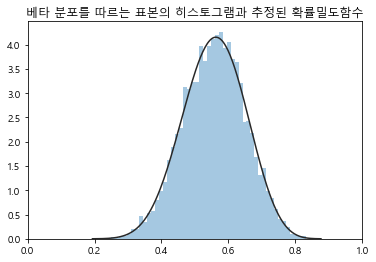

In [11]:
sns.distplot(x, kde=False, norm_hist=True, fit=sp.stats.beta)
plt.xlim(0, 1)
plt.title("베타 분포를 따르는 표본의 히스토그램과 추정된 확률밀도함수")
plt.show()